In [9]:
import numpy as np                              
from astropy import coordinates                 
import astropy.units as u                      
from astropy.coordinates import SkyCoord        
from astropy.coordinates import Galactocentric
from astroquery.gaia import Gaia            
from astroquery.simbad import Simbad  
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
coord   = SkyCoord.from_name('NGC104')
width   = u.Quantity(0.5, u.deg)
height  = u.Quantity(0.5, u.deg)
results = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [11]:
results

dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
0.0004484546653788734,1635721458409799680,Gaia DR2 4689639266844741376,4689639266844741376,1070568446,2015.5,6.021364258343517,0.07217160691330998,-72.08178171514578,0.05154886476600988,0.30301254853531556,0.07688668502438271,3.9410276,5.011712415282747,0.10512221464919902,-2.4191660996605404,0.11534111999287895,0.12406793,0.7231171,0.1054611,-0.19413611,0.25041035,-0.22637597,-0.49412376,-0.09060004,-0.018515091,-0.1327727,112,112,108,4,9.308463,301.32608,0.0561966669065007,0.9524177011353319,31,False,144.49774,1.5029653296671612,0.012460252381976273,-0.053136416,13,10,0.06792664,0,20,False,133,534922.4512953584,800.6103850095465,668.1433,11.367639,10,268340.34071749594,6402.201104568111,41.913765,11.779674,12,591877.4465254205,4934.314773983013,119.951294,10.331341,1.6081169,1,1.4483328,0.412035,1.0362978,--,--,0,--,--,--,NOT_AVAILABLE,305.89567136640295,-44.88873314103185,311.25075340566354,-62.352444106222215,102002,4777.0,4223.5,4959.99,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+4689639266844741376,
0.0021385899746595807,1635721458409799680,Gaia DR2 4689639468699960576,4689639468699960576,1285727079,2015.5,6.019316457186702,0.10645669526192235,-72.07951355616208,0.07711906041723383,0.5

In [12]:
ra                    = results["ra"]                    # deg
ra_error              = results["ra_error"]              # mas
dec                   = results["dec"]                   # deg
dec_error             = results["dec_error"]             # mas
pmra                  = results["pmra"]                  # mas/yr
pmra_error            = results["pmra_error"]            # mas/yr
pmdec                 = results["pmdec"]                 # mas/yr
pmdec_error           = results["pmdec_error"]           # mas/yr

In [13]:
myfile = "gaia_results.dat" # define an output file name
np.savetxt(myfile, np.transpose([ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error]),
          header="ra  ra_error dec dec_error  pmra   pmra_error pmdec  pmdec_error  \n"+
                 "deg mas      deg            mas/yr mas/yr     mas/yr mas/yr      ")

In [14]:
np.loadtxt(myfile)

array([[  6.02136426,   0.07217161, -72.08178172, ...,   0.10512221,
         -2.4191661 ,   0.11534112],
       [  6.01931646,   0.1064567 , -72.07951356, ...,   0.28497987,
         -2.71452248,   0.18800403],
       [  6.02939667,   2.11005449, -72.08077542, ...,          nan,
                 nan,          nan],
       ...,
       [  6.26651436,   0.10079446, -71.83241061, ...,   0.21003722,
         -2.86495775,   0.17478624],
       [  6.26972601,   3.34140287, -71.83231279, ...,          nan,
                 nan,          nan],
       [  5.7764945 ,   0.22801908, -71.83165815, ...,   0.46737819,
         -2.40460376,   0.37052518]])

In [15]:
ra_deg,ra_error_mas,dec_deg,dec_error_mas,pmra_masyr,pmra_error_masyr,pmdec_masyr,pmdec_error_masyr = np.loadtxt(myfile,unpack=True)

In [ ]:
fig = plt.figure(figsize(10,10))
ax = fig.add_subplot(111)


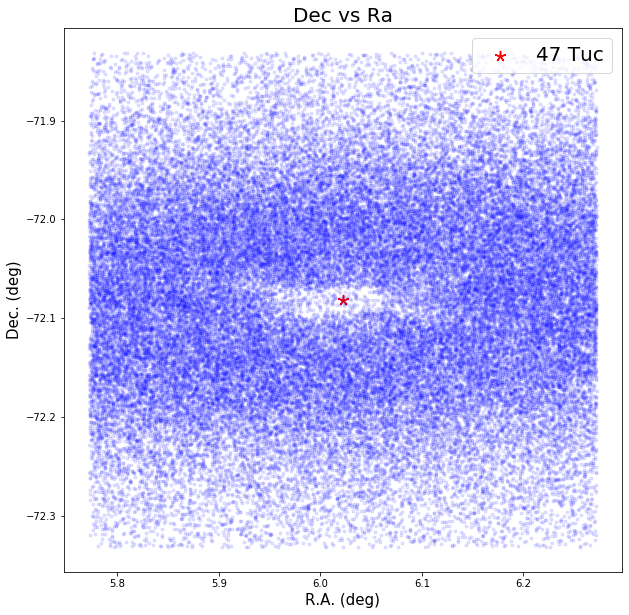

In [28]:
fig  = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(ra_deg,dec_deg,".",color='blue',alpha=0.1)
ax.scatter(coord.ra.deg, coord.dec.deg, marker=(5,2), s=100, color="red", label="47 Tuc")
plt.xlabel("R.A. (deg)",fontsize=15)
plt.ylabel("Dec. (deg)",fontsize=15)
plt.legend(loc="upper right",prop={'size':20})

plt.title("Dec vs Ra",fontsize=20)
plt.show()

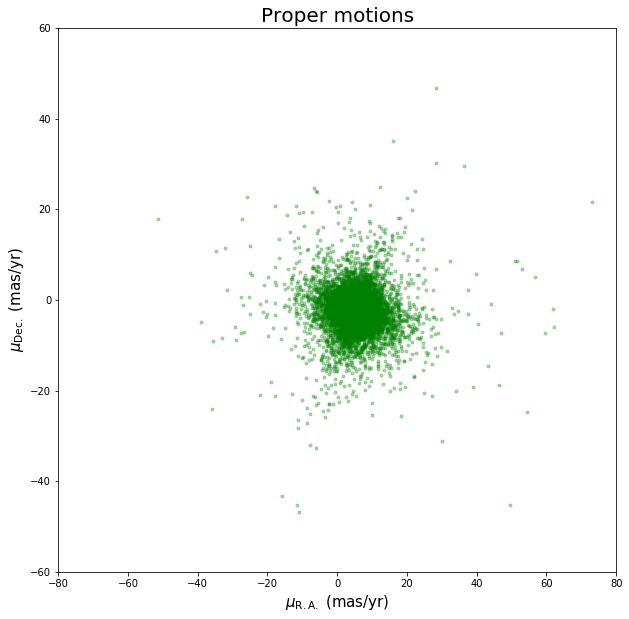

In [33]:
fig  = plt.figure(figsize=(10,10))
# plot Dec. proper motion vs. R.A. proper motion
ax = fig.add_subplot(111)
ax.plot(pmra_masyr,pmdec_masyr,".",color='green',alpha=0.3)
plt.xlim(-80,80)
plt.ylim(-60,60)
plt.xlabel("$\mu_\mathrm{R.A.}$ (mas/yr)",fontsize=15)
plt.ylabel("$\mu_\mathrm{Dec.}$ (mas/yr)",fontsize=15)

plt.title("Proper motions",fontsize=20)
plt.show()